In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt

In [2]:
def get_test_loss(l2):
    data_names = ['Gauss', "Gauss_tight", "ALS_CG", "ALS_CG_tight"]
    data_frames = []
    data_frames.append( pd.read_csv('matlab-log/'+'sol_0_gpu_1_l2_'+l2+'_d_20_t_200_eta_0.3_cgt_20_time_1.csv') )   # Gauss
    data_frames.append( pd.read_csv('matlab-log/'+'sol_0_gpu_1_l2_'+l2+'_d_20_t_200_eta_0.01_cgt_200.csv') ) # Gauss tight
    data_frames.append( pd.read_csv('matlab-log/'+'sol_1_gpu_1_l2_'+l2+'_d_20_t_200_eta_0.3_cgt_20_time_1.csv') )   # ALSCG 
    data_frames.append( pd.read_csv('matlab-log/'+'sol_1_gpu_1_l2_'+l2+'_d_20_t_200_eta_0.01_cgt_200.csv') ) # ALSCG tight
    for i in range(2,len(data_frames)):
        data_frames[i]['#cg'] = data_frames[i]['#cg_U'] + data_frames[i]['#cg_V']
    for i in range(len(data_frames)):
        data_frames[i] = data_frames[i][["#cg", "test_loss"]]
        data_frames[i]["#cg"] = data_frames[i]["#cg"].cumsum()
        data_frames[i] = data_frames[i].rename(columns = {'test_loss': data_names[i]})
    return reduce(lambda left,right: pd.merge(left,right,on=['#cg'], how='outer'), data_frames)

def get_obj(l2):
    data_names = ['Gauss', "Gauss_tight", "ALS_CG", "ALS_CG_tight"]
    data_frames = []
    data_frames.append( pd.read_csv('matlab-log/'+'sol_0_gpu_1_l2_'+l2+'_d_20_t_200_eta_0.3_cgt_20_time_1.csv') )   # Gauss
    data_frames.append( pd.read_csv('matlab-log/'+'sol_0_gpu_1_l2_'+l2+'_d_20_t_200_eta_0.01_cgt_200.csv') ) # Gauss tight
    data_frames.append( pd.read_csv('matlab-log/'+'sol_1_gpu_1_l2_'+l2+'_d_20_t_200_eta_0.3_cgt_20_time_1.csv') )   # ALSCG 
    data_frames.append( pd.read_csv('matlab-log/'+'sol_1_gpu_1_l2_'+l2+'_d_20_t_200_eta_0.01_cgt_200.csv') ) # ALSCG tight
    for i in range(2,len(data_frames)):
        data_frames[i]['#cg'] = data_frames[i]['#cg_U'] + data_frames[i]['#cg_V']
    for i in range(len(data_frames)):
        data_frames[i] = data_frames[i][["#cg", "obj"]]
        data_frames[i]["#cg"] = data_frames[i]["#cg"].cumsum()
        data_frames[i] = data_frames[i].rename(columns = {'obj': data_names[i]})
    return reduce(lambda left,right: pd.merge(left,right,on=['#cg'], how='outer'), data_frames)

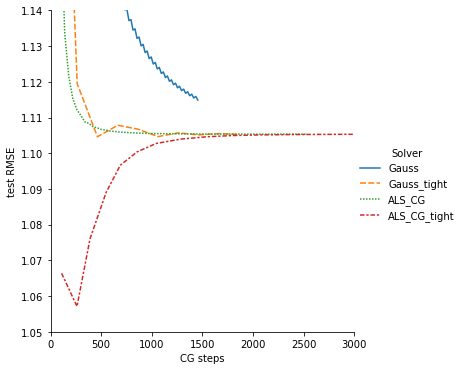

In [13]:
l2 = '5e-1'
data = get_test_loss(l2)
data = data.melt(id_vars="#cg", var_name="Solver", value_name="RMSE")
g = sns.relplot(x="#cg", y="RMSE", kind="line", hue="Solver", style="Solver", dashes=True, data=data)
g.ax.set(ylim=(1.05,1.14), xlim=(0,3000), xlabel="CG steps", ylabel="test RMSE")
g.savefig("fig/fig2-"+l2+"-RMSE.png")

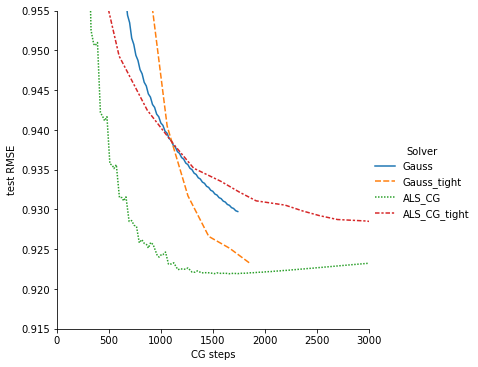

In [14]:
l2 = '5e-2'
data = get_test_loss(l2)
data = data.melt(id_vars="#cg", var_name="Solver", value_name="RMSE")
g = sns.relplot(x="#cg", y="RMSE", kind="line", hue="Solver", style="Solver", dashes=True, data=data)
g.ax.set(ylim=(0.915,0.955), xlim=(0,3000), xlabel="CG steps", ylabel="test RMSE")
g.savefig("fig/fig2-"+l2+"-RMSE.png")

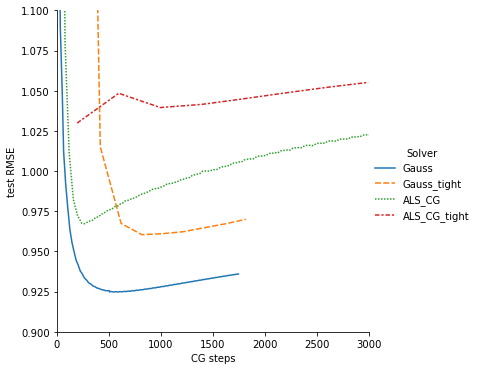

In [15]:
l2 = '5e-3'
data = get_test_loss(l2)
data = data.melt(id_vars="#cg", var_name="Solver", value_name="RMSE")
g = sns.relplot(x="#cg", y="RMSE", kind="line", hue="Solver", style="Solver", dashes=True, data=data)
g.ax.set(ylim=(0.9,1.1), xlim=(0,3000), xlabel="CG steps", ylabel="test RMSE")
g.savefig("fig/fig2-"+l2+"-RMSE.png")

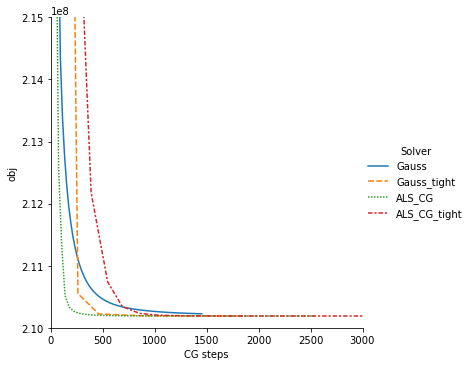

In [19]:
l2 = '5e-1'
data = get_obj(l2)
data = data.melt(id_vars="#cg", var_name="Solver", value_name="obj")
g = sns.relplot(x="#cg", y="obj", kind="line", hue="Solver", style="Solver", dashes=True, data=data)
g.ax.set(ylim=(2.1e8,2.15e8), xlim=(0,3000), xlabel="CG steps", ylabel="obj")
g.savefig("fig/fig1-"+l2+"-obj.png")

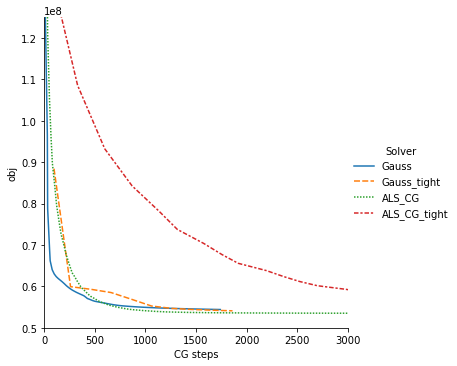

In [26]:
l2 = '5e-2'
data = get_obj(l2)
data = data.melt(id_vars="#cg", var_name="Solver", value_name="obj")
g = sns.relplot(x="#cg", y="obj", kind="line", hue="Solver", style="Solver", dashes=True, data=data)
g.ax.set(ylim=(0.5e8, 1.25e8), xlim=(0,3000), xlabel="CG steps", ylabel="obj")
g.savefig("fig/fig1-"+l2+"-obj.png")

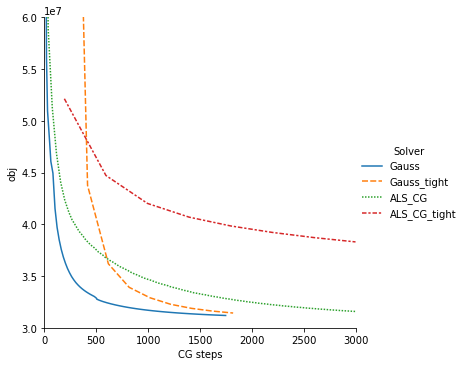

In [31]:
l2 = '5e-3'
data = get_obj(l2)
data = data.melt(id_vars="#cg", var_name="Solver", value_name="obj")
g = sns.relplot(x="#cg", y="obj", kind="line", hue="Solver", style="Solver", dashes=True, data=data)
g.ax.set(ylim=(3e7, 0.6e8), xlim=(0,3000), xlabel="CG steps", ylabel="obj")
g.savefig("fig/fig1-"+l2+"-obj.png")